Fourier transform and reconstruct back

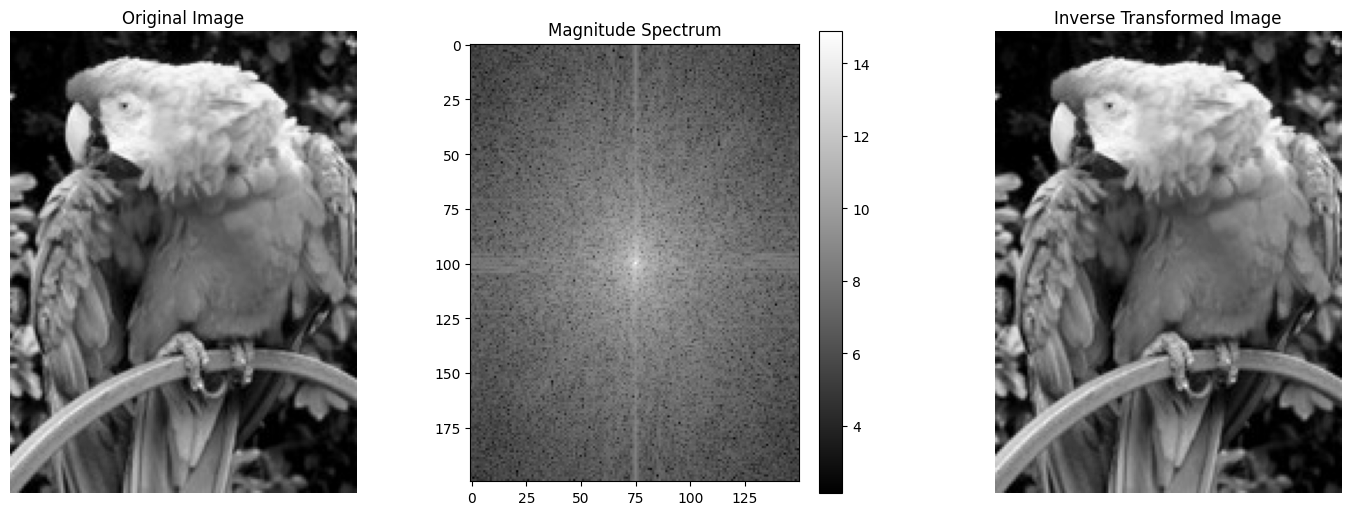

Pixel values of Original Image:
[[  0   0   0 ...   4   0   6]
 [  0   0   0 ...  34  16   0]
 [  4   4   2 ... 101  64   5]
 ...
 [127 134 140 ...  31  17  10]
 [126 143 140 ...  36  27  26]
 [136 135 140 ...  35  29  33]]

Pixel values of Inverse Transformed Image:
[[  0   0   0 ...   4   0   6]
 [  0   0   0 ...  34  16   0]
 [  4   4   2 ... 101  64   5]
 ...
 [127 134 140 ...  31  17  10]
 [126 143 140 ...  36  27  26]
 [136 135 140 ...  35  29  33]]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import numpy as np
from PIL import Image

def fourier_transform(image_path):
    image = Image.open(image_path).convert('L')
    image_array = np.array(image)
    
    # Fourier Transform
    f_transform = np.fft.fft2(image_array)
    f_transform_shifted = np.fft.fftshift(f_transform)
    # magnitude spectrum
    magnitude_spectrum = np.abs(f_transform_shifted)
    # phase spectrum
    phase_spectrum = np.angle(f_transform_shifted)
    
    return magnitude_spectrum, phase_spectrum, image_array


def inverse_fourier_transform(magnitude_spectrum, phase_spectrum):
    f_transform_combined = magnitude_spectrum * np.exp(1j * phase_spectrum)
    # Inverse Fourier transform
    image_inverse_transform = np.fft.ifft2(np.fft.ifftshift(f_transform_combined)).real
    min_val = np.min(image_inverse_transform)
    max_val = np.max(image_inverse_transform)
    image_inverse_transform_normalized = (image_inverse_transform - min_val) / (max_val - min_val) * 255
    image_inverse_transform_normalized = image_inverse_transform_normalized.astype(np.uint8)
    return image_inverse_transform_normalized

def plot_spectrum(magnitude_spectrum, image_array, inverse_transform_image):
    # Plot the original image, magnitude spectrum, and reconstructed image side by side
    plt.figure(figsize=(18, 6))
    
    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(image_array, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    # Magnitude spectrum
    plt.subplot(1, 3, 2)
    plt.imshow(np.log1p(magnitude_spectrum), cmap='gray')
    plt.title('Magnitude Spectrum')
    plt.colorbar()
    
    # Inverse transformed image
    plt.subplot(1, 3, 3)
    plt.imshow(inverse_transform_image, cmap='gray')
    plt.title('Inverse Transformed Image')
    plt.axis('off')
    
    plt.show()
    # Print pixel values
    print("Pixel values of Original Image:")
    print(image_array)
    print("\nPixel values of Inverse Transformed Image:")
    print(inverse_transform_image)
    

image_path = 'bird.jpg'

magnitude_spectrum, phase_spectrum, image_array = fourier_transform(image_path)
inverse_transform_image = inverse_fourier_transform(magnitude_spectrum, phase_spectrum)
plot_spectrum(magnitude_spectrum, image_array, inverse_transform_image)


Original image -> fourier transform -> ideal filter -> reconstruct image

Pixel values of Original Image:
[[  3   2   1 ...  80  67  16]
 [  2   2   1 ...  64 104 138]
 [  1   7   5 ...  41  29 111]
 ...
 [145 129 145 ...   4   4   0]
 [128 145  62 ...   0  17   3]
 [140  88   1 ...  27  48  29]]

Pixel values of Magnitude Spectrum:
[[470.05463649 351.04740843 206.2678658  ... 376.56870787 262.54001765
    9.76566216]
 [489.98542921 348.30113618 592.45329327 ... 406.36485298 354.13587324
  198.29900314]
 [388.99344708  44.01939784 225.34513241 ... 432.39509836 429.70021142
  567.18124245]
 ...
 [388.99344708 567.18124245 429.70021142 ... 400.3011762  225.34513241
   44.01939784]
 [489.98542921 198.29900314 354.13587324 ... 355.45879191 592.45329327
  348.30113618]
 [470.05463649   9.76566216 262.54001765 ... 717.10507582 206.2678658
  351.04740843]]

Pixel values of Ideal Filtered Magnitude Spectrum:
[[470.05463649 351.04740843 206.2678658  ... 376.56870787 262.54001765
    9.76566216]
 [489.98542921 348.30113618 592.45329327 ... 406.36485298 354.13587324
  

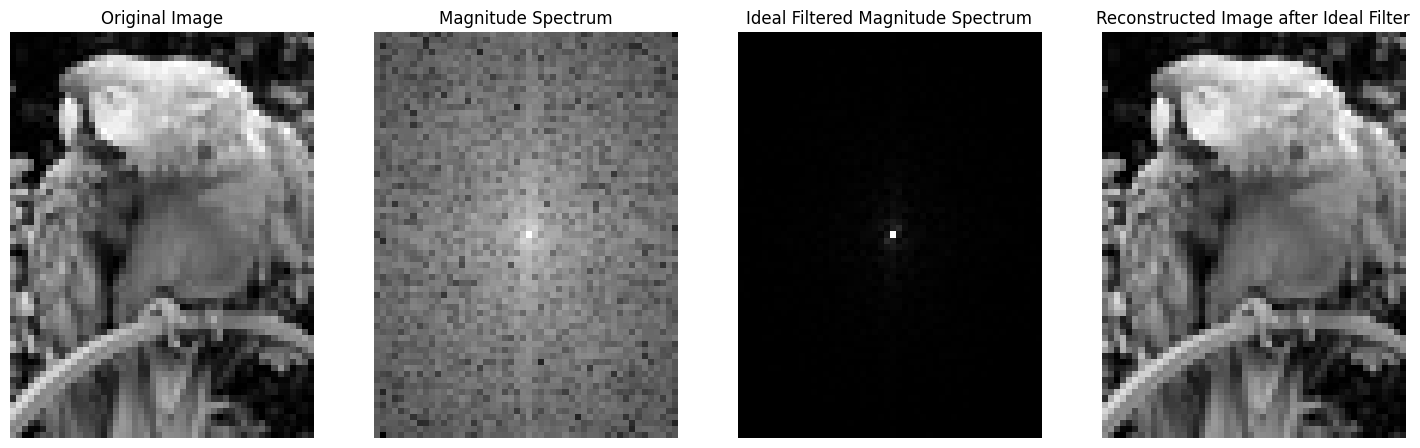

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def fourier_transform(image_path):
    image = Image.open(image_path).convert('L')
    image_array = np.array(image)
    f_transform = np.fft.fft2(image_array)
    f_transform_shifted = np.fft.fftshift(f_transform)
    magnitude_spectrum = np.abs(f_transform_shifted)
    phase_spectrum = np.angle(f_transform_shifted)
    
    return magnitude_spectrum, phase_spectrum, image_array

def ideal_filter(magnitude_spectrum, cutoff_frequency):
    rows, cols = magnitude_spectrum.shape
    center_row, center_col = rows // 2, cols // 2

    y, x = np.ogrid[-center_row:rows - center_row, -center_col:cols - center_col]
    distance = np.sqrt(x ** 2 + y ** 2)

    ideal_mask = distance <= cutoff_frequency

    filtered_spectrum = magnitude_spectrum * ideal_mask

    return filtered_spectrum

def reconstruct_image(magnitude_spectrum, phase_spectrum):
    f_transform_combined = magnitude_spectrum * np.exp(1j * phase_spectrum)
    image_reconstructed = np.fft.ifft2(np.fft.ifftshift(f_transform_combined)).real
    min_val = np.min(image_reconstructed)
    max_val = np.max(image_reconstructed)
    image_reconstructed_normalized = (image_reconstructed - min_val) / (max_val - min_val) * 255
    image_reconstructed_normalized = image_reconstructed_normalized.astype(np.uint8)
    return image_reconstructed_normalized

image_path = '50px_bird.jpg'
cutoff_frequency = 50

magnitude_spectrum, phase_spectrum, image_array = fourier_transform(image_path)

filtered_magnitude_spectrum = ideal_filter(magnitude_spectrum, cutoff_frequency)

reconstructed_image = reconstruct_image(filtered_magnitude_spectrum, phase_spectrum)

plt.figure(figsize=(18, 6))
plt.subplot(1, 4, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')
print("Pixel values of Original Image:")
print(image_array)

plt.subplot(1, 4, 2)
plt.imshow(np.log1p(magnitude_spectrum), cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')
print("\nPixel values of Magnitude Spectrum:")
print(magnitude_spectrum)

plt.subplot(1, 4, 3)
plt.imshow(filtered_magnitude_spectrum, cmap='gray')
plt.title('Ideal Filtered Magnitude Spectrum')
plt.axis('off')
print("\nPixel values of Ideal Filtered Magnitude Spectrum:")
print(filtered_magnitude_spectrum)

plt.subplot(1, 4, 4)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image after Ideal Filter')
plt.axis('off')
print("\nPixel values of Reconstructed Image after Ideal Filter:")
print(reconstructed_image)

plt.show()


Pixel value from original image and reconstruction image is already same.

Pixel values of Original Image:
[[  3   2   1 ...  80  67  16]
 [  2   2   1 ...  64 104 138]
 [  1   7   5 ...  41  29 111]
 ...
 [145 129 145 ...   4   4   0]
 [128 145  62 ...   0  17   3]
 [140  88   1 ...  27  48  29]]

Pixel values of Reconstructed Image after Ideal Filter:
[[  3   2   1 ...  80  67  16]
 [  2   2   1 ...  64 104 138]
 [  1   7   5 ...  41  29 111]
 ...
 [145 129 145 ...   4   4   0]
 [127 145  62 ...   0  17   3]
 [140  88   1 ...  27  48  29]]

Ideal Filter with customized diameter

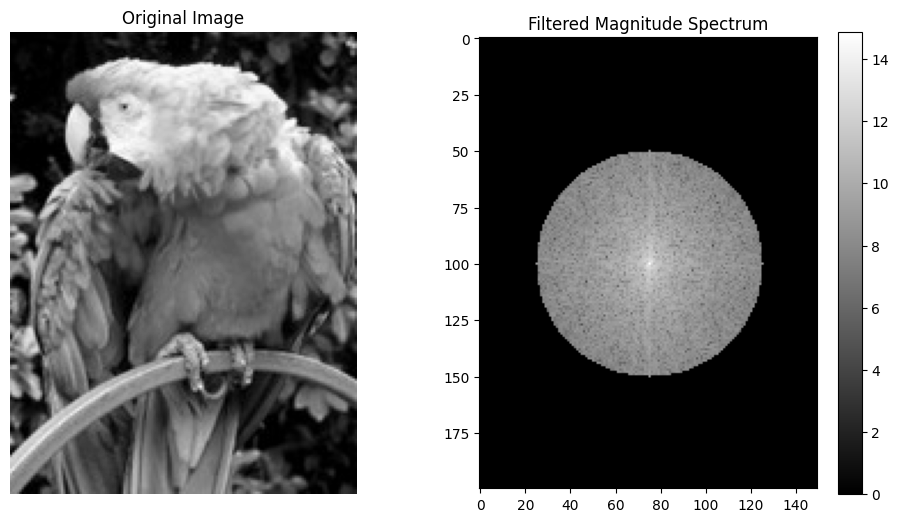

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def ideal_filter(magnitude_spectrum, radius):  # radius is the value you can change
    rows, cols = magnitude_spectrum.shape
    center_row, center_col = rows // 2, cols // 2
    x, y = np.meshgrid(np.arange(cols), np.arange(rows))
    # Calculate distances from the center
    distance = np.sqrt((x - center_col)**2 + (y - center_row)**2)
    # Create the ideal filter mask
    filter_mask = distance <= radius
    return filter_mask

def apply_filter(magnitude_spectrum, filter_mask):
    # Apply the filter to the magnitude spectrum
    filtered_magnitude_spectrum = magnitude_spectrum * filter_mask
    return filtered_magnitude_spectrum

def plot_images(image_array, magnitude_spectrum, filtered_magnitude_spectrum):
    plt.figure(figsize=(12, 6))
    
    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(image_array, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    # Magnitude spectrum with filter
    plt.subplot(1, 2, 2)
    plt.imshow(np.log1p(filtered_magnitude_spectrum), cmap='gray')
    plt.title('Filtered Magnitude Spectrum')
    plt.colorbar()
    
    plt.show()

def main(image_path, radius):  # radius is the value you can change
    # Open the image and convert it to grayscale
    image = Image.open(image_path).convert('L')
    # Convert the image to a numpy array
    image_array = np.array(image)
    
    # Perform the Fourier Transform
    f_transform = np.fft.fft2(image_array)
    # Shift the zero frequency component to the center
    f_transform_shifted = np.fft.fftshift(f_transform)
    # Calculate the magnitude spectrum
    magnitude_spectrum = np.abs(f_transform_shifted)
    
    # Create the ideal filter
    filter_mask = ideal_filter(magnitude_spectrum, radius)  # radius is the value you can change
    # Apply the filter to the magnitude spectrum
    filtered_magnitude_spectrum = apply_filter(magnitude_spectrum, filter_mask)
    
    # Plot the images
    plot_images(image_array, magnitude_spectrum, filtered_magnitude_spectrum)

# Path to the image file
image_path = 'bird.jpg'
# Radius for the ideal filter - Change this value to customize the filter
radius = 50

# Run the main function
main(image_path, radius)  # Change the radius value as needed


Jika diameter(radius) diperbesar, maka lingkaran pada ideal filter juga ikut membesar, begitu pula sebaliknya.
